# 0. EDA och filhantering
- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore.
- c) Skapa folderstrukturen nedan med Python

In [ ]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os

In [4]:
folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
    ('experiment_tiny_data', ['test', 'train', 'val']),
    ('original_data')
]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

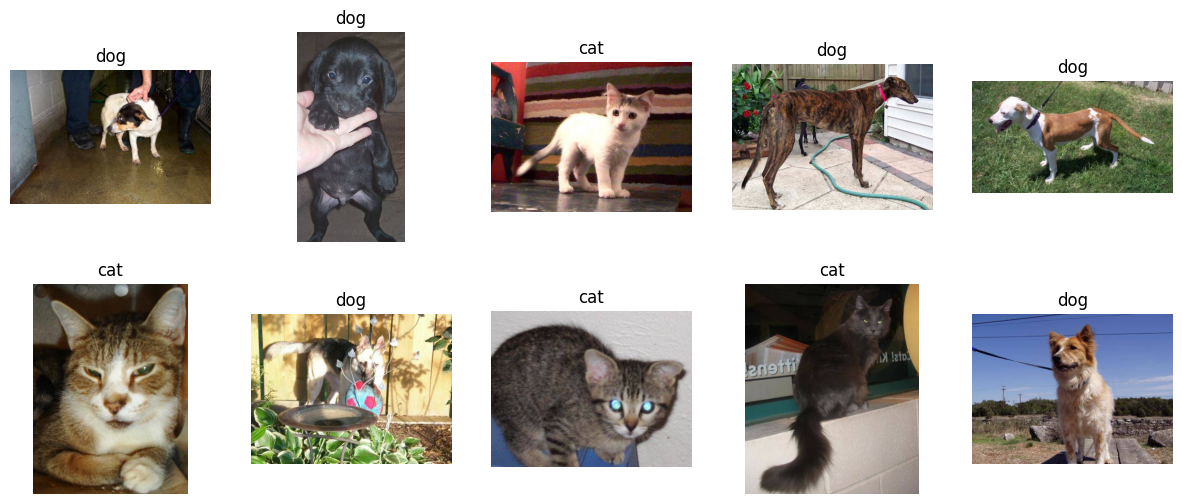

In [23]:
image_folder_path = "original_data/train"

# Create list with all images
all_images = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

# Pick 10 random pictures from the list
random_images = sample(all_images, 10)

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Load images
images = [load_image(image_path) for image_path in random_images]
labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

plot_images(images, labels)

d) Nu ska du göra train|val|test split med följande splits: